In [1]:
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import pandas as pd
import nltk
nltk.download('stopwords')
# nltk.download()

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/datnguyen/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [2]:
from nltk.corpus import stopwords

In [3]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel, euclidean_distances, cosine_similarity

In [4]:
from gensim.models import Word2Vec
from gensim.models import KeyedVectors

In [5]:
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

In [6]:
from nltk.stem import PorterStemmer
from nltk.corpus import wordnet

PS = PorterStemmer()

In [7]:
from jpstemmer import stemming
from copy import copy, deepcopy
from wordcloud import WordCloud
from math import log
from random import randint
from fuzzywuzzy import fuzz

## Constant Variable

In [8]:
DATA_PATH = "liquor_data_new.csv"

In [9]:
FLAVOUR_COLUMNS = ["f1", "f2", "f3", "f4", "f5", "f6"]

In [10]:
EMBEDDED_FILES = "latest-ja-word2vec-gensim-model/word2vec.gensim.model"
WORD_TXT_FILE = "jawiki_20180420_300d.txt"

## Data Initial

In [13]:
def load_data(data_path=DATA_PATH):
    return pd.read_csv(data_path, encoding="utf-8", sep="\t")

In [14]:
df_initial = load_data()

In [15]:
df_initial.head()

,name,intl_name,brand_name,brand_intl_name,year_month,rank,score,f1,f2,f3,f4,f5,f6,flavour_tags,checkin_count,pictures,similar_brands,id,similar_brand_taste
0,上川大雪,Kamikawataisetsu,北海道,Hokkaido,202001,1,4.299969,0.516103,0.484763,0.203029,0.419481,0.276085,0.453028,|グイグイ|メロン|フレッシュ|上品|丸み|フルーティ|旨味|甘味|酸味|マスカット|ガス|...,117,https://s3-ap-northeast-1.amazonaws.com/physal...,加茂錦|而今|陸奥八仙|宮寒梅|十四代,8685,上川大雪|東洋美人|十四代|冩楽|笑四季|Ohmine Junmai|川中島|豊明|至|一白水成
1,國稀,Kunimare,北海道,Hokkaido,202001,2,4.099463,0.187750,0.304858,0.417155,0.539935,0.527491,0.357793,|辛口|蜜|スッキリ|力強い|旨味|ゴクゴク|洋梨|若い|じっくり|薄い|円やか|ちびちび|...,210,https://s3-ap-northeast-1.amazonaws.com/physal...,月山|黒牛|龍力|谷川岳|春鹿,1928,國稀|黎明|越前岬|鷹来屋|宮の雪|初孫|住吉|春鶯囀|長良川|辰泉
2,男山,Otokoyama,北海道,Hokkaido,202001,3,4.095614,0.277607,0.394435,0.327092,0.520835,0.454270,0.427476,|辛口|酸味|甘味|旨味|スッキリ|冷酒|常温|ヨーグルト|ヤクルト|熱燗|ひろがる|バラン...,397,https://s3-ap-northeast-1.amazonaws.com/physal...,春鹿|まんさくの花|酔鯨|加賀鳶|いづみ橋,2,男山|八海山|喜楽長|杉勇|神聖|大那|如空|千代むすび|七冠馬|白隠正宗
3,国士無双,Kokushimuso,北海道,Hokkaido,202001,4,4.079436,0.387998,0.256487,0.161930,0.372511,0.593511,0.516169,|辛口|洋梨|ピリリ|フルーティ|荒々しい|スパイシー|さらり|果物|酸味|さわやか|スイス...,208,https://s3-ap-northeast-1.amazonaws.com/physal...,上喜元|酔心|澤乃井|加賀鳶|司牡丹,10,国士無双|真野鶴|無想|藍の郷|あら玉|福祝|幻の瀧|高清水|きりんざん|北光正宗
4,北の錦,Kitanonishiki,北海道,Hokkaido,202001,5,4.055023,0.344262,0.393210,0.501239,0.564264,0.211910,0.335154,|とろみ|荒々しい|力強い|ほのか|薄い|トロピカル|ヨーグルト|濃厚|苦味|チーズ|旨味|...,85,https://s3-ap-northeast-1.amazonaws.com/physal...,誠鏡|原田|龍力|旦|天の戸,11,北の錦|爛漫|木戸泉|松みどり|芳水|千福|玉櫻|磐城壽|豊久仁|喜久酔


## Data Statistic

In [16]:
tab_infor = pd.DataFrame(df_initial.dtypes).T.rename({0: "dtypes"})
tab_infor = tab_infor.append(pd.DataFrame(df_initial.count() * 100 / len(df_initial)).T.rename({0: "Occuring_percent"}))
tab_infor

,name,intl_name,brand_name,brand_intl_name,year_month,rank,score,f1,f2,f3,f4,f5,f6,flavour_tags,checkin_count,pictures,similar_brands,id,similar_brand_taste
dtypes,object,object,object,object,int64,int64,float64,float64,float64,float64,float64,float64,float64,object,int64,object,object,int64,object
Occuring_percent,100,86.5672,100,100,100,100,100,69.5896,69.5896,69.5896,69.5896,69.5896,69.5896,98.2276,100,99.9067,88.2463,100,69.5896


## Load Gensim Word2Vec

In [17]:
# w2v_model = Word2Vec.load(EMBEDDED_FILES)
w2v_model = KeyedVectors.load_word2vec_format(WORD_TXT_FILE)

## Data Cleaning

In [20]:
# df_non_duplicate = df_initial.drop(df_initial.name.duplicated)

In [21]:
# df_nan_cleared = df_initial[df_initial.f1.notnull() & df_initial.flavour_tags.notnull()]

In [22]:
# df_nan_cleared[df_nan_cleared.name.duplicated() & df_nan_cleared.brand_name.duplicated()].shape

In [23]:
key_tags = []

for ft in df_initial.flavour_tags:
    if pd.isna(ft) or pd.isnull(ft) or isinstance(ft, float): continue
    ft = ft.split("|")
    key_tags.extend(ft)

In [24]:
key_tags = np.unique(key_tags)

In [25]:
key_tags = [kt for kt in key_tags if kt]

In [26]:
# w2v_model.build_vocab(key_tags)
# w2v_model.train(key_tags, total_examples=w2v_model.corpus_count, epochs=20)

In [27]:
def count_words(df, column):
    keys_root = {}
    
    for kt in key_tags: keys_root[kt] = 0
    
    for ft in df[column]:
        if pd.isnull(ft) or pd.isna(ft) or isinstance(ft, float): continue
        
        for word in ft.split("|"):
            if len(word): keys_root[word] += 1
                
    key_occurrences = []
    for k,v in keys_root.items():
        key_occurrences.append([k, v])
    
    key_occurrences = sorted(key_occurrences, key=lambda x: x[1], reverse=True)
                
    return keys_root, key_occurrences

In [28]:
keys_count, keys_occurences = count_words(df_initial, "flavour_tags")

In [29]:
# keys_count = pd.DataFrame(keys_count.items(), columns=["word", "frequency"])

In [30]:
# keys_count

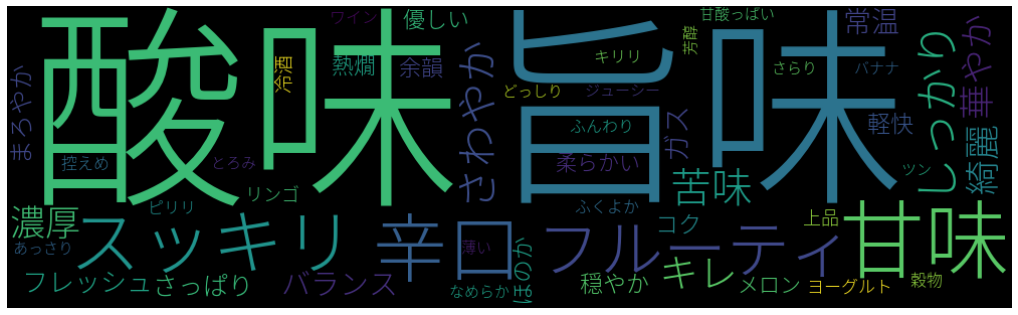

In [31]:
def words_frequency_plot(keys_occurences):
#     plt.figure(figsize=(12, 12))
#     plt.barh(keys_count['word'], keys_count['frequency'])
#     plt.title('Counts of classes of objects');

    fig = plt.figure(1, figsize=(18,13))
    ax1 = fig.add_subplot(2,1,1)

    words = {}
    for x in keys_occurences:
        words[x[0]] = x[1]
    
    font_path = "NotoSansCJKjp-hinted/NotoSansCJKjp-Light.otf"
    
    wordcloud = WordCloud(width=1000,height=300, background_color='black', 
                          max_words=100,relative_scaling=1,
                          normalize_plurals=False, font_path=font_path).generate_from_frequencies(words)
    ax1.imshow(wordcloud, interpolation="bilinear")
    ax1.axis('off')
    plt.show()
    
words_frequency_plot(keys_occurences[0:50])

In [32]:
def keyword_inventory(df, column):
    keys_root = {}
    keys_category = {}
    keys_selection = []
    
    for ft in df[column]:
        if pd.isnull(ft) or pd.isna(ft) or isinstance(ft, float): continue
        
        for tag in ft.split("|"):
            if not tag: continue
            tag_stem = stemming(tag)
            
            if tag_stem not in keys_root.keys():
                keys_root[tag_stem] = {tag}
            else:
                keys_root[tag_stem].add(tag)
                
        for k, vls in keys_root.items():
            min_length = 1000
            selection = None
            
            for vl in vls:
                if len(vl) < min_length:
                    min_length = len(vl)
                    selection = vl
            keys_category[k] = selection
            keys_selection.append(selection)
            
    return keys_root, keys_category, keys_selection

In [33]:
keys_root, keys_category, keys_selection = keyword_inventory(df_initial, "flavour_tags")

In [34]:
keys_category

{'グイグイ': 'グイグイ',
 'メロン': 'メロン',
 'フレッシュ': 'フレッシュ',
 '上品': '上品',
 '丸み': '丸み',
 'フルーティ': 'フルーティ',
 '旨味': '旨味',
 '甘味': '甘味',
 '酸味': '酸味',
 'マスカット': 'マスカット',
 'ガス': 'ガス',
 '派手': '派手',
 '若い': '若い',
 'スッキリ': 'スッキリ',
 'クリーミー': 'クリーミー',
 'バランス': 'バランス',
 'じっくり': 'じっくり',
 '苦味': '苦味',
 'スイスイ': 'スイスイ',
 'リンゴ': 'リンゴ',
 '辛口': '辛口',
 '蜜': '蜜',
 '力強い': '力強い',
 'ゴクゴク': 'ゴクゴク',
 '洋梨': '洋梨',
 '薄い': '薄い',
 '円やか': '円やか',
 'ちびちび': 'ちびちび',
 '深み': '深み',
 'まろやか': 'まろやか',
 '複雑': '複雑',
 'まったり': 'まったり',
 'しっかり': 'しっかり',
 '柔らかい': '柔らかい',
 '冷酒': '冷酒',
 '常温': '常温',
 'ヨーグルト': 'ヨーグルト',
 'ヤクルト': 'ヤクルト',
 '熱燗': '熱燗',
 'ひろがる': 'ひろがる',
 'じわじわ': 'じわじわ',
 '控えめ': '控えめ',
 'ツン': 'ツン',
 '濃厚': '濃厚',
 'コク': 'コク',
 'ピリリ': 'ピリリ',
 '荒々しい': '荒々しい',
 'スパイシー': 'スパイシー',
 'さらり': 'さらり',
 '果物': '果物',
 'さわやか': 'さわやか',
 'ミルク': 'ミルク',
 'ほのか': 'ほのか',
 'なめらか': 'なめらか',
 '心地よい': '心地よい',
 '渋み': '渋み',
 'とろみ': 'とろみ',
 'トロピカル': 'トロピカル',
 'チーズ': 'チーズ',
 '紹興酒': '紹興酒',
 'こってり': 'こってり',
 'カラメル': 'カラメル',
 'アミノ酸': 'アミノ酸',
 '栗': '栗',
 '砂糖': '砂糖',
 '綺麗': '綺

In [35]:
def keyword_replacement(df, column, keys_category, keep_root=False):
    df_new = copy(df)
    
    for idx, ft in enumerate(df[column]):
        if pd.isnull(ft) or pd.isna(ft) or isinstance(ft, float): continue
        new_ft = []
        
        if not keep_root:
            for word in ft.split("|"):
                if not word: continue
                word_stem = stemming(word)
                new_ft.append(keys_category[word_stem])
            
            df_new.at[idx, column] = "|".join(new_ft)
    
    return df_new

In [36]:
df_keyword_cleaned = keyword_replacement(df_initial, "flavour_tags", keys_category, keep_root=False)

In [37]:
df_keyword_cleaned.head()

,name,intl_name,brand_name,brand_intl_name,year_month,rank,score,f1,f2,f3,f4,f5,f6,flavour_tags,checkin_count,pictures,similar_brands,id,similar_brand_taste
0,上川大雪,Kamikawataisetsu,北海道,Hokkaido,202001,1,4.299969,0.516103,0.484763,0.203029,0.419481,0.276085,0.453028,グイグイ|メロン|フレッシュ|上品|丸み|フルーティ|旨味|甘味|酸味|マスカット|ガス|派...,117,https://s3-ap-northeast-1.amazonaws.com/physal...,加茂錦|而今|陸奥八仙|宮寒梅|十四代,8685,上川大雪|東洋美人|十四代|冩楽|笑四季|Ohmine Junmai|川中島|豊明|至|一白水成
1,國稀,Kunimare,北海道,Hokkaido,202001,2,4.099463,0.187750,0.304858,0.417155,0.539935,0.527491,0.357793,辛口|蜜|スッキリ|力強い|旨味|ゴクゴク|洋梨|若い|じっくり|薄い|円やか|ちびちび|酸...,210,https://s3-ap-northeast-1.amazonaws.com/physal...,月山|黒牛|龍力|谷川岳|春鹿,1928,國稀|黎明|越前岬|鷹来屋|宮の雪|初孫|住吉|春鶯囀|長良川|辰泉
2,男山,Otokoyama,北海道,Hokkaido,202001,3,4.095614,0.277607,0.394435,0.327092,0.520835,0.454270,0.427476,辛口|酸味|甘味|旨味|スッキリ|冷酒|常温|ヨーグルト|ヤクルト|熱燗|ひろがる|バランス...,397,https://s3-ap-northeast-1.amazonaws.com/physal...,春鹿|まんさくの花|酔鯨|加賀鳶|いづみ橋,2,男山|八海山|喜楽長|杉勇|神聖|大那|如空|千代むすび|七冠馬|白隠正宗
3,国士無双,Kokushimuso,北海道,Hokkaido,202001,4,4.079436,0.387998,0.256487,0.161930,0.372511,0.593511,0.516169,辛口|洋梨|ピリリ|フルーティ|荒々しい|スパイシー|さらり|果物|酸味|さわやか|スイスイ...,208,https://s3-ap-northeast-1.amazonaws.com/physal...,上喜元|酔心|澤乃井|加賀鳶|司牡丹,10,国士無双|真野鶴|無想|藍の郷|あら玉|福祝|幻の瀧|高清水|きりんざん|北光正宗
4,北の錦,Kitanonishiki,北海道,Hokkaido,202001,5,4.055023,0.344262,0.393210,0.501239,0.564264,0.211910,0.335154,とろみ|荒々しい|力強い|ほのか|薄い|トロピカル|ヨーグルト|濃厚|苦味|チーズ|旨味|リ...,85,https://s3-ap-northeast-1.amazonaws.com/physal...,誠鏡|原田|龍力|旦|天の戸,11,北の錦|爛漫|木戸泉|松みどり|芳水|千福|玉櫻|磐城壽|豊久仁|喜久酔


In [38]:
df_nan_cleared = df_keyword_cleaned[df_keyword_cleaned.f1.notnull() & df_keyword_cleaned.flavour_tags.notnull()].reset_index()

## Implement Algorithms

In [39]:
df_nan_cleared["flavour_tags"] = df_nan_cleared["flavour_tags"].apply(lambda x: x.replace("|", " "))

In [40]:
df_nan_cleared.flavour_tags[0:10]

0    グイグイ メロン フレッシュ 上品 丸み フルーティ 旨味 甘味 酸味 マスカット ガス 派...
1    辛口 蜜 スッキリ 力強い 旨味 ゴクゴク 洋梨 若い じっくり 薄い 円やか ちびちび 酸...
2    辛口 酸味 甘味 旨味 スッキリ 冷酒 常温 ヨーグルト ヤクルト 熱燗 ひろがる バランス...
3    辛口 洋梨 ピリリ フルーティ 荒々しい スパイシー さらり 果物 酸味 さわやか スイスイ...
4    とろみ 荒々しい 力強い ほのか 薄い トロピカル ヨーグルト 濃厚 苦味 チーズ 旨味 リ...
5    栗 砂糖 旨味 しっかり 複雑 マスカット 辛口 円やか 綺麗 キリリ 甘味 どっしり フル...
6    芳香 洋梨 淡い クリーミー 昔ながら 熱燗 渋み 冷酒 旨味 するする 穀物 なめらか 控...
7    ゴクゴク じわじわ セメダイン キリリ 複雑 豊か 辛口 ツン どっしり 華やか さらり リ...
8    ハチミツ 穀物 ミルク 甘味 力強い キャラメル ガス ふくよか キレ フレッシュ 優しい ...
9    レモン バナナ マイルド しっかり フルーティ 優しい 甘酸っぱい 柑橘 メロン ガス ふく...
Name: flavour_tags, dtype: object

In [41]:
flavour_tags = df_nan_cleared["flavour_tags"]

In [44]:
# flavour_tags = flavour_tags.to_numpy()
# flavour_tags[:2]
flavour_tags = flavour_tags.as_matrix()
# flavour_tags = [ft.split(" ") for ft in flavour_tags]
# flavour_tags

In [45]:
for idx, fl in enumerate(flavour_tags):
    if '蜜' in fl:
        print(fl)
        break

辛口 蜜 スッキリ 力強い 旨味 ゴクゴク 洋梨 若い じっくり 薄い 円やか ちびちび 酸味 深み 苦味 まろやか 複雑 まったり しっかり 柔らかい


In [46]:
tf_idf = TfidfVectorizer()

In [47]:
fl_tf_idf_matrix = tf_idf.fit(flavour_tags)

In [48]:
tf_idf_list = dict(zip(fl_tf_idf_matrix.get_feature_names(), fl_tf_idf_matrix.idf_))
tf_idf_feature = fl_tf_idf_matrix.get_feature_names()
len(tf_idf_feature)

134

In [49]:
def calculate_tf_idf(term, document_t, documents):
    tf = document_t.count(term)/len(document_t)
    n_docs_term = 0
    
    for doc in documents:
        if term in doc:
            n_docs_term += 1
    idf = 1 + log(len(documents)/n_docs_term)
    
    return tf*idf

In [50]:
def calculate_tf_idf_w2v(flavour_tag, flavour_tags, tf_idf_list):
    word_repre = np.zeros((300,))
    tf_idf_sum = 0
    flavour_tag = flavour_tag.split(" ")
    
    for word in flavour_tag:
        if pd.isnull(word) or pd.isna(word) or isinstance(word, float): continue
        
        if word in tf_idf_feature:
            tf_idf_w = (tf_idf_list[word] * flavour_tag.count(word))/len(flavour_tag)
        else:
            tf_idf_w = calculate_tf_idf(word, flavour_tag, flavour_tags)
            
        tf_idf_sum += tf_idf_w
        word_repre += tf_idf_w * w2v_model.wv[word]
    
    return word_repre/tf_idf_sum

In [53]:
def build_vector_matrix(df, flavour_tags=flavour_tags, tf_idf_list=tf_idf_list, column="flavour_tags"):
    matrix = []
    
    for ft in df[column]:
        if pd.isnull(ft) or pd.isna(ft) or isinstance(ft, float): continue
        word_repre = calculate_tf_idf_w2v(ft, flavour_tags, tf_idf_list)
        matrix.append(word_repre)
    matrix = np.stack(matrix)
    flavour_taste = df[FLAVOUR_COLUMNS].as_matrix()
    
    return np.concatenate([flavour_taste, matrix], axis=-1)

In [54]:
vector_matrix = build_vector_matrix(df_nan_cleared)

In [55]:
vector_matrix[:10]

array([[ 0.51610285,  0.48476329,  0.20302933, ..., -0.207838  ,
        -0.36574561, -0.06537751],
       [ 0.18775025,  0.30485848,  0.41715547, ..., -0.11572741,
        -0.29405932,  0.03027181],
       [ 0.27760726,  0.39443511,  0.3270922 , ..., -0.16042809,
        -0.30845672, -0.0607616 ],
       ...,
       [ 0.28167066,  0.26329616,  0.22991377, ..., -0.10021935,
        -0.33598357, -0.04889478],
       [ 0.25341186,  0.38263226,  0.42035648, ..., -0.05781459,
        -0.29447231, -0.02804845],
       [ 0.50938791,  0.30740866,  0.13547669, ..., -0.1503776 ,
        -0.40887704,  0.01424836]])

In [56]:
cosine_matrix = cosine_similarity(vector_matrix, vector_matrix)
cosine_matrix

array([[1.        , 0.90996737, 0.89331795, ..., 0.91699539, 0.89341495,
        0.9069776 ],
       [0.90996737, 1.        , 0.90065615, ..., 0.90570543, 0.92115054,
        0.90329055],
       [0.89331795, 0.90065615, 1.        , ..., 0.89319385, 0.91922797,
        0.90208421],
       ...,
       [0.91699539, 0.90570543, 0.89319385, ..., 1.        , 0.9194474 ,
        0.94707977],
       [0.89341495, 0.92115054, 0.91922797, ..., 0.9194474 , 1.        ,
        0.93409475],
       [0.9069776 , 0.90329055, 0.90208421, ..., 0.94707977, 0.93409475,
        1.        ]])

In [57]:
gausian_filter = lambda x,y,sigma: math.exp(-(x-y)**2/(2*sigma**2))

In [58]:
def calculate_sigma(list_flavour_taste):
    mean = np.mean(list_flavour_taste)
    
    sigma_hat = 0
    for i, value in enumerate(list_flavour_taste):
        sigma_hat += (value - mean)**2
    
    return float(math.sqrt(sigma_hat/len(list_flavour_taste)))

In [59]:
def criteria_selection(f1_m, f2_m, f3_m, f4_m, f5_m, f6_m,
                       f1_c, f2_c, f3_c, f4_c, f5_c, f6_c,
                       sigma_1, sigma_2, sigma_3, sigma_4, sigma_5, sigma_6,
                       flavour_tags_m, flavour_tags_c):
    fc_1 = gausian_filter(f1_m, f1_c, sigma_1)
    fc_2 = gausian_filter(f2_m, f2_c, sigma_2)
    fc_3 = gausian_filter(f3_m, f3_c, sigma_3)
    fc_4 = gausian_filter(f4_m, f4_c, sigma_4)
    fc_5 = gausian_filter(f5_m, f5_c, sigma_5)
    fc_6 = gausian_filter(f6_m, f6_c, sigma_6)
    fc_7 = fuzz.token_sort_ratio(flavour_tags_m, flavour_tags_c)/100
#     print('fc1-6 ---- {} --- {}'.format(fc_1 + fc_2 + fc_3 + fc_4 + fc_5 + fc_6, fc_7))
    
    return (fc_1 + fc_2 + fc_3 + fc_4 + fc_5 + fc_6) + fc_7

In [70]:
def recommand(entry, liquors, top=10):
    flavour_value = liquors[FLAVOUR_COLUMNS]
    flavour_tags = liquors['flavour_tags']
    
    sigma_1 = calculate_sigma(flavour_value['f1'])
    sigma_2 = calculate_sigma(flavour_value['f2'])
    sigma_3 = calculate_sigma(flavour_value['f3'])
    sigma_4 = calculate_sigma(flavour_value['f4'])
    sigma_5 = calculate_sigma(flavour_value['f5'])
    sigma_6 = calculate_sigma(flavour_value['f6'])
    
#     flavour_list = list(liquors.to_numpy(np.concatenate([FLAVOUR_COLUMNS, ['flavour_tags', 'pictures', 'name']])))
    flavour_list = np.concatenate((flavour_value.as_matrix(), np.expand_dims(flavour_tags.as_matrix(), axis=-1)), axis=-1)
    flavour_list = list(flavour_list)
    m_item = entry[FLAVOUR_COLUMNS]
    f1_m, f2_m, f3_m, f4_m, f5_m, f6_m = m_item[0], m_item[1], m_item[2], m_item[3], m_item[4], m_item[5]
    flavour_tags_m = entry['flavour_tags']
    flavour_list.sort(key=lambda x: criteria_selection(f1_m, f2_m, f3_m, f4_m, f5_m, f6_m,
                                                       x[0], x[1], x[2], x[3], x[4], x[5],
                                                       sigma_1, sigma_2, sigma_3, sigma_4, sigma_5, sigma_6,
                                                       flavour_tags_m, x[6]),
                                                       reverse=True)
    return flavour_list[:top]

In [71]:
def find_similarity(df, liquor_id, cosine_matrix, top=30):
    entry = df.iloc[liquor_id]
    top_indices = pd.Series(cosine_matrix[liquor_id]).sort_values(ascending=False)[0:top]
    top_indices = top_indices.index.values
    liquors = df.iloc[top_indices]
    flavour_list = recommand(entry, liquors)
    
    
    return flavour_list

In [97]:
liquor_id = randint(0, len(df_nan_cleared))

import time
import math
start = time.time()
print("---Finding similar items")
results = find_similarity(df_nan_cleared, liquor_id, cosine_matrix)
# print(results)
print("Time query----", time.time() - start)

---Finding similar items
Time query---- 0.025147199630737305


## Plot results

In [73]:
def plot_results(liquor_main, liquor_compared):
    index = np.arange(6)
    bar_width = 0.35
    
    j = {idx: [x[0], x[1], x[2], x[3], x[4], x[5]] 
         for idx, x in enumerate([liquor_main, liquor_compared])}
    df = pd.DataFrame(j)
    print(df)
    
    fig, ax = plt.subplots()
    
    main = ax.bar(index, list(df[0]), bar_width, label="Main")
    compared = ax.bar(index+bar_width, list(df[1]), bar_width, label="Compare")
    
    ax.set_xlabel('Flavour tags')
    ax.set_ylabel('Values')
    ax.set_title('Compare result')
    ax.set_xticks(index + bar_width / 2)
    ax.set_xticklabels(['f1', 'f2', 'f3', 'f4', 'f5', 'f6'])
    ax.legend()
    
    plt.show()

          0         1
0  0.394775  0.394775
1  0.333049  0.333049
2  0.297423  0.297423
3  0.391465  0.391465
4  0.428326  0.428326
5  0.555034  0.555034


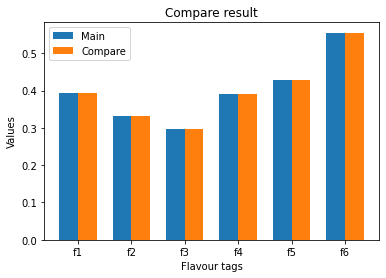

          0         1
0  0.394775  0.410234
1  0.333049  0.313439
2  0.297423  0.288256
3  0.391465  0.453110
4  0.428326  0.396152
5  0.555034  0.536774


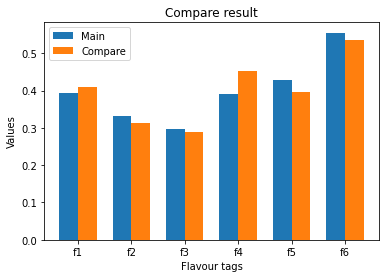

          0         1
0  0.394775  0.413729
1  0.333049  0.353989
2  0.297423  0.238137
3  0.391465  0.320229
4  0.428326  0.478806
5  0.555034  0.561257


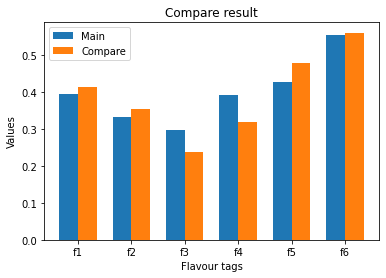

          0         1
0  0.394775  0.397150
1  0.333049  0.388452
2  0.297423  0.219905
3  0.391465  0.336666
4  0.428326  0.457534
5  0.555034  0.565983


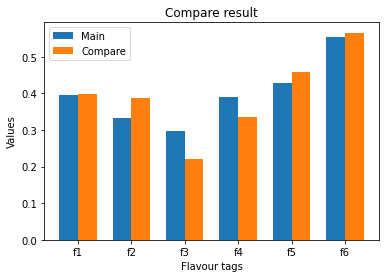

          0         1
0  0.394775  0.443271
1  0.333049  0.372206
2  0.297423  0.217626
3  0.391465  0.408576
4  0.428326  0.378470
5  0.555034  0.554471


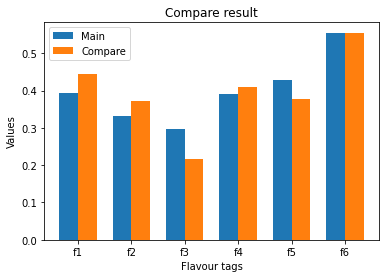

          0         1
0  0.394775  0.442952
1  0.333049  0.422780
2  0.297423  0.258612
3  0.391465  0.397986
4  0.428326  0.352738
5  0.555034  0.524741


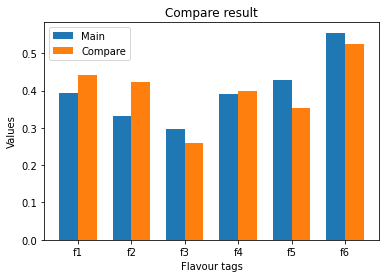

In [74]:
entry_record = df_nan_cleared.iloc[liquor_id]
liquor_main = entry_record[FLAVOUR_COLUMNS]

for idx, row in enumerate(results[0:6]):
#     if idx == 0: continue
    liquor_compared = row
    plot_results(liquor_main, liquor_compared)

## Evaluation model

In [75]:
def evaluation(df, liquor_main, list_liquors):
    mse = 0
    for item in list_liquors:
        e = np.subtract(np.array(item[:6]), liquor_main)
        mse += (e**2)
    
    return mse, np.array(list_liquors).shape[0]

In [87]:
def compute_sum_mse(df, start=0, top=30):
    sum_loss = 0
    total_number = 0

    for i in df.index.values:
        list_liquors = find_similarity(df, i, cosine_matrix, top=top)
        liquor_main = df[FLAVOUR_COLUMNS].iloc[i].values
        mse, number_liquor = evaluation(df, liquor_main, list_liquors)
        total_number += number_liquor
        sum_loss += mse.sum()

    print('Square error ---- {} - start ----- {}'.format(sum_loss, start))
    print('Total number of record ----- {}'.format(total_number))
    print('Mean square error ----- {}'.format(sum_loss/total_number))
    
    return sum_loss/total_number

In [88]:
# compute_sum_mse()

In [89]:
def compare_flavour_tags(tag_1, tag_2):
    if pd.isnull(tag_1) or pd.isnull(tag_2): return 0
    
    tag_1 = tag_1.split(' ')
    tag_2 = tag_2.split(' ')
    
    count = 0
    for i in tag_1:
        if i in tag_2:
            count += 1
            
    return float(count/len(tag_1))

In [90]:
[compare_flavour_tags(row[6], results[0][6]) for i, row in enumerate(results)]

[1.0, 0.55, 0.55, 0.4, 0.55, 0.5, 0.45, 0.45, 0.35, 0.45]

In [91]:
def find_optimal_top_k(df, start=20, end=41):
    sum_mse_values = []
    
    for i in range(start, end):
        sum_mse = compute_sum_mse(df, top=i)
        sum_mse_values.append(sum_mse)
    
    return sum_mse_values

In [92]:
sum_mse_values = find_optimal_top_k(df_nan_cleared)

Square error ---- 287.59989075257425 - start ----- 0
Total number of record ----- 7430
Mean square error ----- 0.038707926077062485
Square error ---- 280.4986487965402 - start ----- 0
Total number of record ----- 7430
Mean square error ----- 0.03775217345848455
Square error ---- 274.80399269668084 - start ----- 0
Total number of record ----- 7430
Mean square error ----- 0.03698573252983591
Square error ---- 268.7665437460365 - start ----- 0
Total number of record ----- 7430
Mean square error ----- 0.03617315528210451
Square error ---- 263.7949228002182 - start ----- 0
Total number of record ----- 7430
Mean square error ----- 0.03550402729478038
Square error ---- 258.43028586243986 - start ----- 0
Total number of record ----- 7430
Mean square error ----- 0.0347820034808129
Square error ---- 252.61981304534905 - start ----- 0
Total number of record ----- 7430
Mean square error ----- 0.033999974837866626
Square error ---- 249.29112014034456 - start ----- 0
Total number of record ----- 743

In [93]:
sum_mse_values

[0.038707926077062485,
 0.03775217345848455,
 0.03698573252983591,
 0.03617315528210451,
 0.03550402729478038,
 0.0347820034808129,
 0.033999974837866626,
 0.03355196771740842,
 0.03292770749887,
 0.03247204019032536,
 0.03195497993325853,
 0.0314536229833896,
 0.03105076923687955,
 0.030612319450480284,
 0.03023884722128632,
 0.029973879330670156,
 0.029664272024763537,
 0.029364718188601563,
 0.029094182318292,
 0.028814084017477426,
 0.02853095103359543]